# Get and explore dataset

In [481]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import seaborn as sns

from collections import Counter

In [482]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [483]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [484]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [485]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [486]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

The MEAN number of words within the Dataset is: 4.34 

The Standard Deviation of the Dataset is: 2.17 



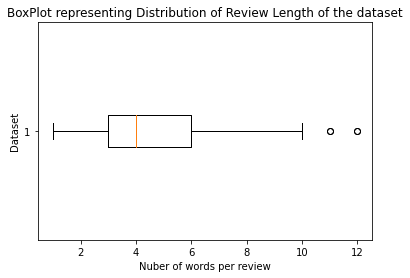


The number of unique words contained in the Dataset is: 2559

The total number of reviews contained within the Dataset is: 1793
There are 872 Positive reviews.
There are 921 Negative reviews.
The longest review contains 12 words.
The shortest review contains 1 word.


In [487]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

import statistics as stats

# When calculating the mean of the dataset; we first need to find the length of each review
# We can do this by using the split function and then append each length to a new empty list
# Variable data currently contains all positive and negative reviews.
length = []
for total in data:
    number_of_words = total.split()
    length.append(len(number_of_words))

mean = stats.mean(length)
print(f"The MEAN number of words within the Dataset is:",round(mean, 2),'\n')
std_deviation = stats.stdev(length)
print(f"The Standard Deviation of the Dataset is:",round(std_deviation, 2),'\n')

plt.title('BoxPlot representing Distribution of Review Length of the dataset')
plt.boxplot(length, vert=False)
plt.xlabel('Nuber of words per review')
plt.ylabel('Dataset')
plt.show()

# - Calculate the number of unique words in the dataset
words = ' '.join(data)
words = words.split()
unique_words = len(set(words))
print('\nThe number of unique words contained in the Dataset is:',unique_words)

# - Perform any other dataset investigation that you feel would be valuable

# Find the total number of reviews in the dataset
print('\nThe total number of reviews contained within the Dataset is:',len(data))

# Represent how the data is split between positive and negative reviews
split = to_word_label(labels)
counts = Counter(split)
print(f"There are {counts['positive']} Positive reviews.")
print(f"There are {counts['negative']} Negative reviews.")

print(f'The longest review contains {max(length)} words.')
print(f'The shortest review contains {min(length)} word.')

In [488]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2559)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19, 492, 493], [2, 830, 4, 2, 831], [131], [6, 308, 4, 832], [1, 12, 3]]


# Pre-processing

In [489]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
from keras_preprocessing.sequence import pad_sequences

# Using the Mean of the data to establish a common length
maxlen=4
padded_data = pad_sequences(tokenized_data, maxlen=maxlen)

In [490]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=None, shuffle=True)

print(X_train[0:10])
print(y_train[0:10])


[[   4   45 1841 1842]
 [   4   33   11  288]
 [   8  107    6   46]
 [   0    1  257  129]
 [   7  121    9    3]
 [   8   26   17  135]
 [1374 1375    6 1376]
 [   0    0    0   80]
 [1144 1145 1146 1147]
 [   0    0    0   89]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [491]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):      
    #To do
    # Convert test sets
    testX = to_class(X_test)
    testY = to_class(y_test)
    testPredict = to_class(model.predict(X_test))
    
    # Precision score
    precision = precision_score(testY, testPredict)
    print("Precision Score: %.2f" % (precision))
    
    # Recall Score
    recall = recall_score(testY, testPredict)
    print("Recall Score: %.2f" % (recall))
    
    # F1 Score
    f1 = f1_score(testY, testPredict)
    print("F1 Score: %.2f" % (f1))
    
    # Confusion Matrix
    print("Confusion matrix:")
    print(confusion_matrix(testY, testPredict))

# Build and tune model

Define network architecture

### Model 1

In [492]:
# Import required libraries for RNN
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, BatchNormalization
from keras.models import Sequential

#Compile the embedding layer
input_dim = vocab_size
output_dim = 100
input_length = 4

# Initialize model
model = Sequential()

model.add(Embedding(input_dim, output_dim, input_length=input_length))
model.add(SpatialDropout1D(0.2))

model.add(BatchNormalization())
model.add(LSTM(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

Train model

In [493]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Parameter for model fitting
n_epochs = 20
batch_size = 10

# Fit model
fitData = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
144/144 - 1s - loss: 0.6765 - accuracy: 0.5537 - val_loss: 0.6870 - val_accuracy: 0.5153 - 1s/epoch - 10ms/step
Epoch 2/20
144/144 - 0s - loss: 0.4791 - accuracy: 0.8389 - val_loss: 0.6390 - val_accuracy: 0.6128 - 390ms/epoch - 3ms/step
Epoch 3/20
144/144 - 0s - loss: 0.2684 - accuracy: 0.9031 - val_loss: 0.6429 - val_accuracy: 0.6379 - 380ms/epoch - 3ms/step
Epoch 4/20
144/144 - 0s - loss: 0.2047 - accuracy: 0.9324 - val_loss: 0.6996 - val_accuracy: 0.6602 - 378ms/epoch - 3ms/step
Epoch 5/20
144/144 - 0s - loss: 0.1451 - accuracy: 0.9512 - val_loss: 0.8041 - val_accuracy: 0.6379 - 377ms/epoch - 3ms/step
Epoch 6/20
144/144 - 0s - loss: 0.1055 - accuracy: 0.9693 - val_loss: 0.8306 - val_accuracy: 0.6657 - 377ms/epoch - 3ms/step
Epoch 7/20
144/144 - 0s - loss: 0.0899 - accuracy: 0.9721 - val_loss: 0.8670 - val_accuracy: 0.6602 - 391ms/epoch - 3ms/step
Epoch 8/20
144/144 - 0s - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.8459 - val_accuracy: 0.6797 - 382ms/epoch - 3ms/step
Ep

Examine performance of model

In [494]:
assess_model(model, X_test, y_test)

12/12 [==============================] - 0s 1ms/step
Precision Score: 0.68
Recall Score: 0.73
F1 Score: 0.70
Confusion matrix:
[[114  62]
 [ 50 133]]


### Model 2

In [495]:
#Compile the embedding layer
# Change output_dim  to 500
input_dim = vocab_size
output_dim = 500
input_length = 4

# Initialize model
model2 = Sequential()

model2.add(Embedding(input_dim, output_dim, input_length=input_length))
model2.add(SpatialDropout1D(0.2))

model2.add(BatchNormalization())
model2.add(LSTM(32, activation='sigmoid'))
model2.add(Dense(2, activation='softmax'))

In [496]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Parameter for model fitting
# Increase batch size to 32
n_epochs = 20
batch_size = 32

# Fit model
fitData2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
45/45 - 2s - loss: 0.6795 - accuracy: 0.5488 - val_loss: 0.6954 - val_accuracy: 0.4903 - 2s/epoch - 35ms/step
Epoch 2/20
45/45 - 1s - loss: 0.4533 - accuracy: 0.8821 - val_loss: 0.6750 - val_accuracy: 0.5961 - 562ms/epoch - 12ms/step
Epoch 3/20
45/45 - 1s - loss: 0.2605 - accuracy: 0.9086 - val_loss: 0.6534 - val_accuracy: 0.6212 - 557ms/epoch - 12ms/step
Epoch 4/20
45/45 - 1s - loss: 0.1946 - accuracy: 0.9386 - val_loss: 0.6353 - val_accuracy: 0.6351 - 555ms/epoch - 12ms/step
Epoch 5/20
45/45 - 1s - loss: 0.1515 - accuracy: 0.9596 - val_loss: 0.6141 - val_accuracy: 0.6407 - 565ms/epoch - 13ms/step
Epoch 6/20
45/45 - 1s - loss: 0.1178 - accuracy: 0.9735 - val_loss: 0.6246 - val_accuracy: 0.6407 - 550ms/epoch - 12ms/step
Epoch 7/20
45/45 - 1s - loss: 0.0964 - accuracy: 0.9798 - val_loss: 0.6263 - val_accuracy: 0.6462 - 549ms/epoch - 12ms/step
Epoch 8/20
45/45 - 1s - loss: 0.0823 - accuracy: 0.9826 - val_loss: 0.6585 - val_accuracy: 0.6685 - 568ms/epoch - 13ms/step
Epoch 9/20


In [497]:
assess_model(model2, X_test, y_test)

12/12 [==============================] - 0s 2ms/step
Precision Score: 0.64
Recall Score: 0.68
F1 Score: 0.66
Confusion matrix:
[[107  69]
 [ 58 125]]


### Model 3

In [498]:
#Compile the embedding layer
# Change output_dim  to 1000
input_dim = vocab_size
output_dim = 1000
input_length = 4

# Initialize model
model3 = Sequential()

model3.add(Embedding(input_dim, output_dim, input_length=input_length))
model3.add(SpatialDropout1D(0.2))

model3.add(BatchNormalization())
model3.add(LSTM(32, activation='sigmoid'))
model3.add(Dense(2, activation='softmax'))

In [499]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Parameter for model fitting
# Increase batch size to 64
n_epochs = 20
batch_size = 64

# Fit model
fitData3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
23/23 - 2s - loss: 0.6726 - accuracy: 0.5837 - val_loss: 0.6950 - val_accuracy: 0.4958 - 2s/epoch - 70ms/step
Epoch 2/20
23/23 - 1s - loss: 0.4539 - accuracy: 0.8926 - val_loss: 0.6827 - val_accuracy: 0.5682 - 600ms/epoch - 26ms/step
Epoch 3/20
23/23 - 1s - loss: 0.2688 - accuracy: 0.9100 - val_loss: 0.6626 - val_accuracy: 0.6379 - 625ms/epoch - 27ms/step
Epoch 4/20
23/23 - 1s - loss: 0.2084 - accuracy: 0.9372 - val_loss: 0.6477 - val_accuracy: 0.6546 - 604ms/epoch - 26ms/step
Epoch 5/20
23/23 - 1s - loss: 0.1734 - accuracy: 0.9477 - val_loss: 0.6391 - val_accuracy: 0.6267 - 602ms/epoch - 26ms/step
Epoch 6/20
23/23 - 1s - loss: 0.1380 - accuracy: 0.9665 - val_loss: 0.6276 - val_accuracy: 0.6379 - 570ms/epoch - 25ms/step
Epoch 7/20
23/23 - 1s - loss: 0.1168 - accuracy: 0.9791 - val_loss: 0.6277 - val_accuracy: 0.6128 - 587ms/epoch - 26ms/step
Epoch 8/20
23/23 - 1s - loss: 0.1024 - accuracy: 0.9763 - val_loss: 0.6145 - val_accuracy: 0.6602 - 600ms/epoch - 26ms/step
Epoch 9/20


In [500]:
assess_model(model3, X_test, y_test)

12/12 [==============================] - 0s 3ms/step
Precision Score: 0.66
Recall Score: 0.66
F1 Score: 0.66
Confusion matrix:
[[115  61]
 [ 63 120]]


### Model 4

In [501]:
#Compile the embedding layer
# Change output_dim  to 50
input_dim = vocab_size
output_dim = 50
input_length = 4

# Initialize model
model4 = Sequential()

model4.add(Embedding(input_dim, output_dim, input_length=input_length))
model4.add(SpatialDropout1D(0.2))

model4.add(BatchNormalization())
model4.add(LSTM(32, activation='sigmoid'))
model4.add(Dense(2, activation='softmax'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [502]:
# Parameter for model fitting
# Increase batch size to 128
n_epochs = 20
batch_size = 128

# Fit model
fitData4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
12/12 - 1s - loss: 0.6946 - accuracy: 0.5084 - val_loss: 0.6929 - val_accuracy: 0.4903 - 1s/epoch - 90ms/step
Epoch 2/20
12/12 - 0s - loss: 0.6635 - accuracy: 0.6444 - val_loss: 0.6919 - val_accuracy: 0.5097 - 60ms/epoch - 5ms/step
Epoch 3/20
12/12 - 0s - loss: 0.6165 - accuracy: 0.7490 - val_loss: 0.6903 - val_accuracy: 0.5265 - 59ms/epoch - 5ms/step
Epoch 4/20
12/12 - 0s - loss: 0.5356 - accuracy: 0.8794 - val_loss: 0.6876 - val_accuracy: 0.6156 - 59ms/epoch - 5ms/step
Epoch 5/20
12/12 - 0s - loss: 0.4290 - accuracy: 0.9066 - val_loss: 0.6828 - val_accuracy: 0.5850 - 58ms/epoch - 5ms/step
Epoch 6/20
12/12 - 0s - loss: 0.3279 - accuracy: 0.9086 - val_loss: 0.6778 - val_accuracy: 0.5710 - 61ms/epoch - 5ms/step
Epoch 7/20
12/12 - 0s - loss: 0.2546 - accuracy: 0.9219 - val_loss: 0.6729 - val_accuracy: 0.5738 - 59ms/epoch - 5ms/step
Epoch 8/20
12/12 - 0s - loss: 0.2094 - accuracy: 0.9358 - val_loss: 0.6689 - val_accuracy: 0.5710 - 60ms/epoch - 5ms/step
Epoch 9/20
12/12 - 0s - l

In [503]:
assess_model(model4, X_test, y_test)

12/12 [==============================] - 0s 819us/step
Precision Score: 0.63
Recall Score: 0.80
F1 Score: 0.71
Confusion matrix:
[[ 91  85]
 [ 37 146]]


### Model 5

In [504]:
#Compile the embedding layer
# Change output_dim  to 25
input_dim = vocab_size
output_dim = 25
input_length = 4

# Initialize model
model5 = Sequential()

model5.add(Embedding(input_dim, output_dim, input_length=input_length))
model5.add(SpatialDropout1D(0.2))

model5.add(BatchNormalization())
model5.add(LSTM(32, activation='sigmoid'))
model5.add(Dense(2, activation='softmax'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [505]:
# Parameter for model fitting
# Increase batch size to 64
n_epochs = 20
batch_size = 64

# Fit model
fitData5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
23/23 - 1s - loss: 0.7079 - accuracy: 0.4854 - val_loss: 0.6953 - val_accuracy: 0.4903 - 1s/epoch - 47ms/step
Epoch 2/20
23/23 - 0s - loss: 0.6728 - accuracy: 0.6416 - val_loss: 0.6922 - val_accuracy: 0.5097 - 71ms/epoch - 3ms/step
Epoch 3/20
23/23 - 0s - loss: 0.6253 - accuracy: 0.7608 - val_loss: 0.6902 - val_accuracy: 0.6045 - 70ms/epoch - 3ms/step
Epoch 4/20
23/23 - 0s - loss: 0.5269 - accuracy: 0.8801 - val_loss: 0.6846 - val_accuracy: 0.5850 - 70ms/epoch - 3ms/step
Epoch 5/20
23/23 - 0s - loss: 0.3936 - accuracy: 0.9031 - val_loss: 0.6765 - val_accuracy: 0.5933 - 69ms/epoch - 3ms/step
Epoch 6/20
23/23 - 0s - loss: 0.2875 - accuracy: 0.9121 - val_loss: 0.6683 - val_accuracy: 0.5794 - 70ms/epoch - 3ms/step
Epoch 7/20
23/23 - 0s - loss: 0.2287 - accuracy: 0.9282 - val_loss: 0.6585 - val_accuracy: 0.5933 - 69ms/epoch - 3ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1789 - accuracy: 0.9498 - val_loss: 0.6615 - val_accuracy: 0.5933 - 70ms/epoch - 3ms/step
Epoch 9/20
23/23 - 0s - l

In [506]:
assess_model(model5, X_test, y_test)

12/12 [==============================] - 0s 819us/step
Precision Score: 0.64
Recall Score: 0.73
F1 Score: 0.68
Confusion matrix:
[[102  74]
 [ 50 133]]


### Model 6

In [507]:
#Compile the embedding layer
# Change output_dim  to 25
input_dim = vocab_size
output_dim = 25
input_length = 4

# Initialize model
model6 = Sequential()

model6.add(Embedding(input_dim, output_dim, input_length=input_length))
model6.add(SpatialDropout1D(0.2))

model6.add(BatchNormalization())
model6.add(LSTM(32, activation='sigmoid'))
model6.add(Dense(2, activation='softmax'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [508]:
# Parameter for model fitting
# Increase batch size to 32
n_epochs = 20
batch_size = 32

# Fit model
fitData6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=n_epochs, verbose=2)

Epoch 1/20
45/45 - 1s - loss: 0.6901 - accuracy: 0.5377 - val_loss: 0.6925 - val_accuracy: 0.5097 - 1s/epoch - 25ms/step
Epoch 2/20
45/45 - 0s - loss: 0.6457 - accuracy: 0.7029 - val_loss: 0.6893 - val_accuracy: 0.5153 - 111ms/epoch - 2ms/step
Epoch 3/20
45/45 - 0s - loss: 0.4979 - accuracy: 0.8612 - val_loss: 0.6769 - val_accuracy: 0.5655 - 110ms/epoch - 2ms/step
Epoch 4/20
45/45 - 0s - loss: 0.3053 - accuracy: 0.9093 - val_loss: 0.6539 - val_accuracy: 0.5933 - 110ms/epoch - 2ms/step
Epoch 5/20
45/45 - 0s - loss: 0.1978 - accuracy: 0.9414 - val_loss: 0.6601 - val_accuracy: 0.5850 - 110ms/epoch - 2ms/step
Epoch 6/20
45/45 - 0s - loss: 0.1448 - accuracy: 0.9575 - val_loss: 0.6322 - val_accuracy: 0.6128 - 111ms/epoch - 2ms/step
Epoch 7/20
45/45 - 0s - loss: 0.1185 - accuracy: 0.9700 - val_loss: 0.6426 - val_accuracy: 0.6267 - 109ms/epoch - 2ms/step
Epoch 8/20
45/45 - 0s - loss: 0.0935 - accuracy: 0.9777 - val_loss: 0.6232 - val_accuracy: 0.6630 - 113ms/epoch - 3ms/step
Epoch 9/20
45/45 -

In [509]:
assess_model(model6, X_test, y_test)

12/12 [==============================] - 0s 910us/step
Precision Score: 0.67
Recall Score: 0.67
F1 Score: 0.67
Confusion matrix:
[[116  60]
 [ 60 123]]


Plot graphs for accuracy and loss

### Graphs representing Model 1

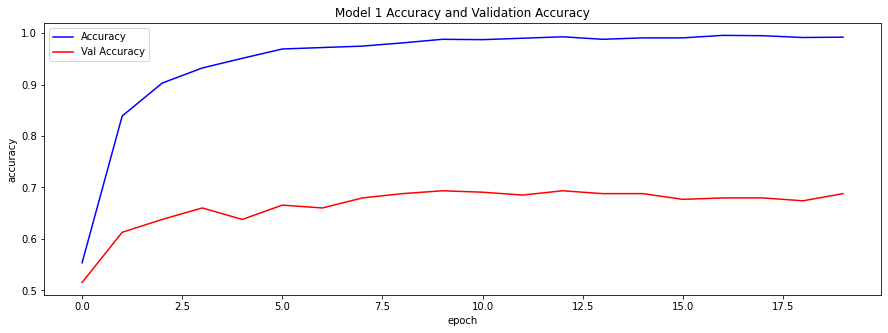

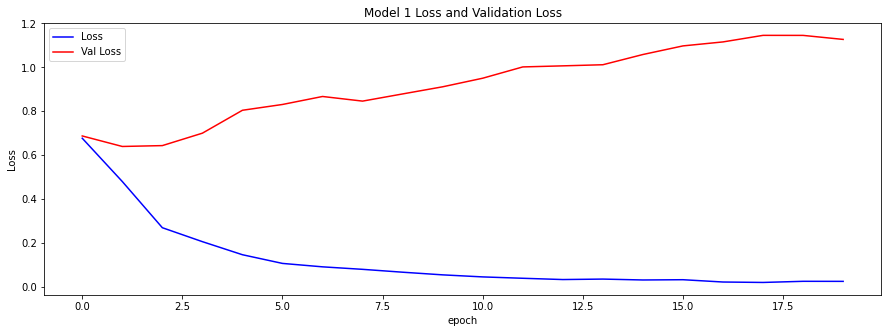

In [510]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData.history['accuracy'], color='b')
plt.plot(fitData.history['val_accuracy'], color='red')
plt.title('Model 1 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData.history['loss'], color='b')
plt.plot(fitData.history['val_loss'], color='red')
plt.title('Model 1 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

### Graphs representing Model 2

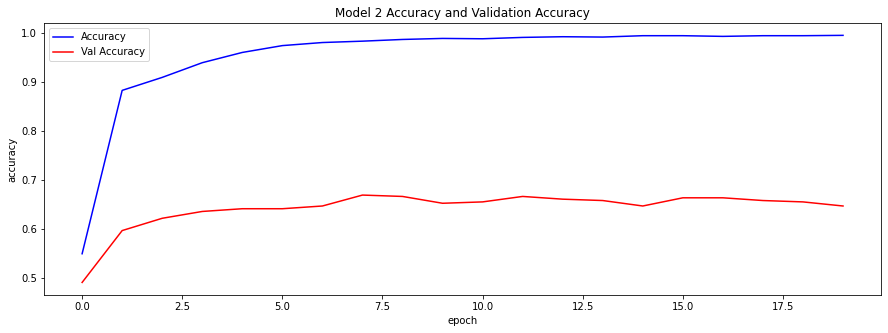

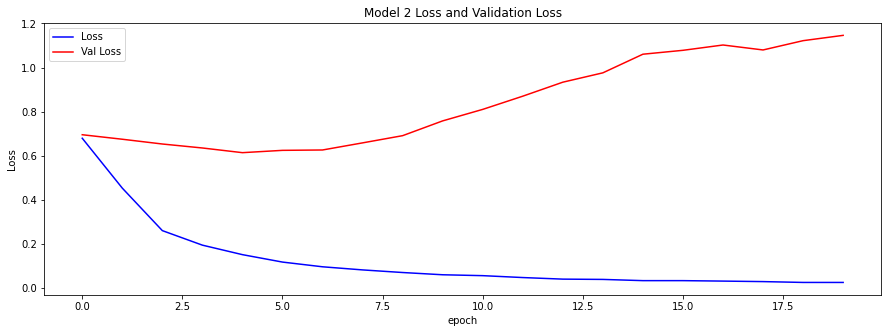

In [511]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData2.history['accuracy'], color='b')
plt.plot(fitData2.history['val_accuracy'], color='red')
plt.title('Model 2 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData2.history['loss'], color='b')
plt.plot(fitData2.history['val_loss'], color='red')
plt.title('Model 2 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

### Graphs representing Model 3

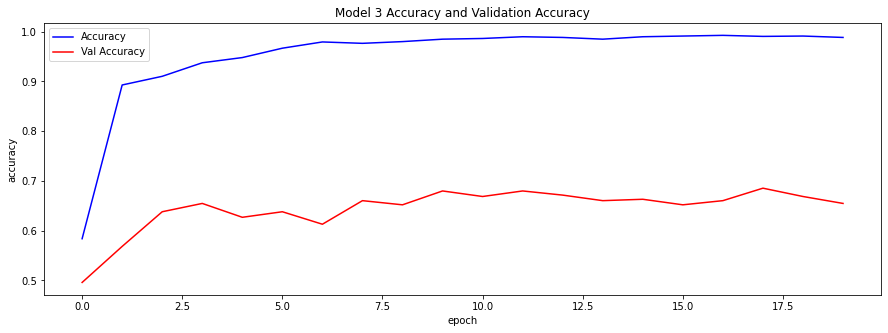

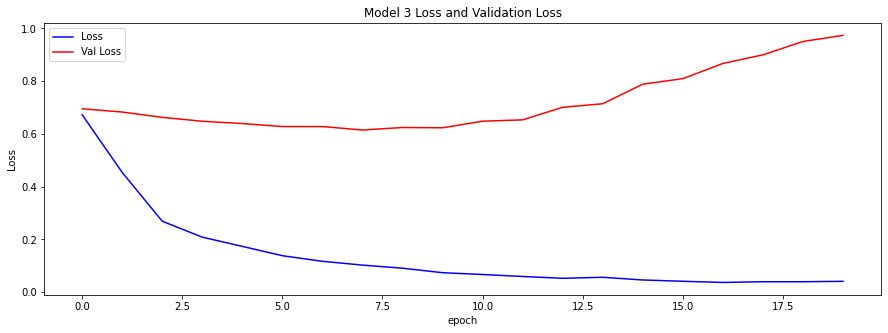

In [512]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData3.history['accuracy'], color='b')
plt.plot(fitData3.history['val_accuracy'], color='red')
plt.title('Model 3 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData3.history['loss'], color='b')
plt.plot(fitData3.history['val_loss'], color='red')
plt.title('Model 3 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

### Graphs representing Model 4

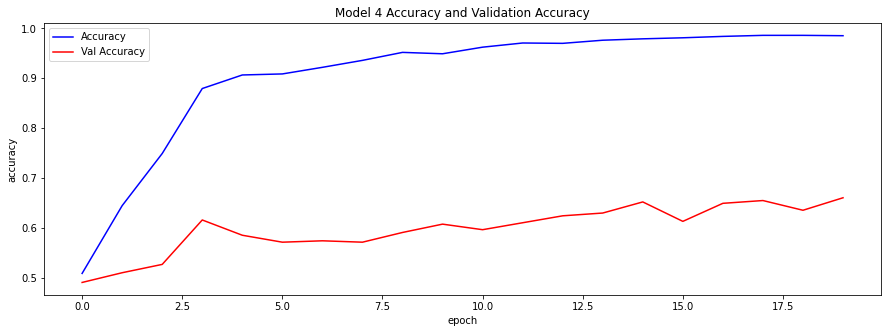

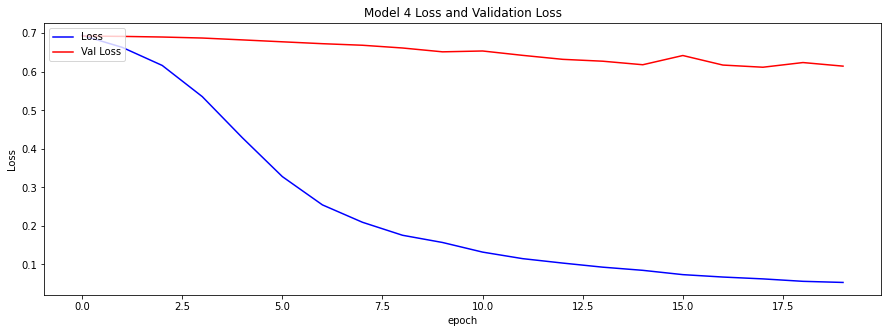

In [513]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData4.history['accuracy'], color='b')
plt.plot(fitData4.history['val_accuracy'], color='red')
plt.title('Model 4 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData4.history['loss'], color='b')
plt.plot(fitData4.history['val_loss'], color='red')
plt.title('Model 4 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

### Graphs representing Model 5

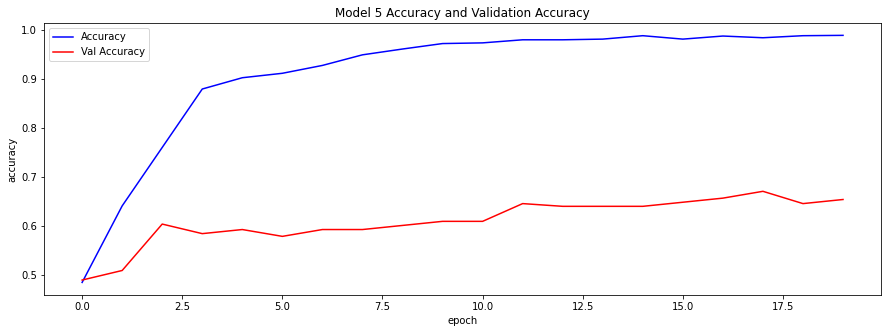

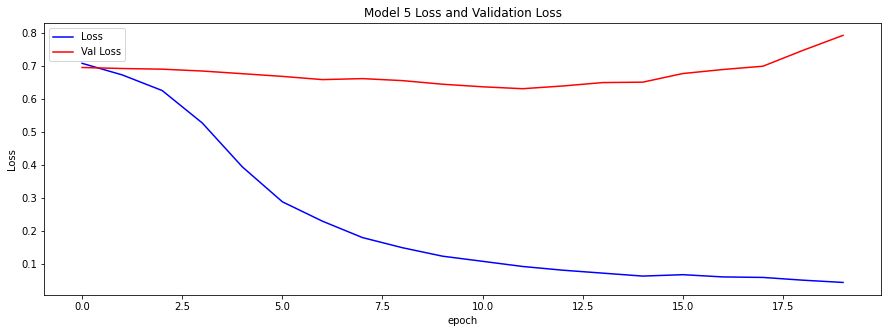

In [514]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData5.history['accuracy'], color='b')
plt.plot(fitData5.history['val_accuracy'], color='red')
plt.title('Model 5 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData5.history['loss'], color='b')
plt.plot(fitData5.history['val_loss'], color='red')
plt.title('Model 5 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

### Graphs representing Model 6

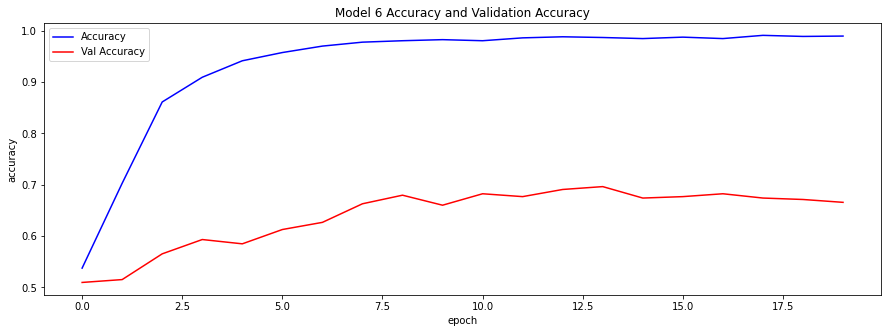

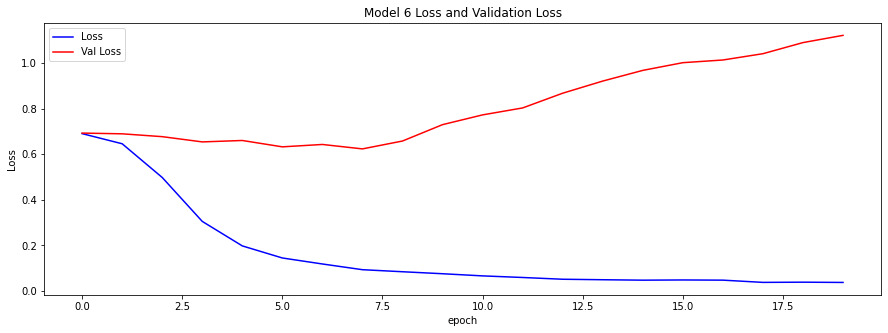

In [515]:
# Accuracy graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData6.history['accuracy'], color='b')
plt.plot(fitData6.history['val_accuracy'], color='red')
plt.title('Model 6 Accuracy and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# Loss graph
fig = plt.figure(figsize=(15, 5))
plt.plot(fitData6.history['loss'], color='b')
plt.plot(fitData6.history['val_loss'], color='red')
plt.title('Model 6 Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

# Make a prediction

In [516]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

In [517]:
pred = model.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 11ms/step


['positive', 'negative', 'positive', 'negative', 'negative']

In [518]:
pred = model2.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 11ms/step


['positive', 'negative', 'positive', 'positive', 'positive']

In [519]:
pred = model3.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 12ms/step


['negative', 'negative', 'positive', 'negative', 'positive']

In [520]:
pred = model4.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 11ms/step


['negative', 'negative', 'negative', 'negative', 'negative']

In [521]:
pred = model5.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 12ms/step


['negative', 'negative', 'positive', 'negative', 'negative']

In [522]:
pred = model6.predict(padded)
to_word_label(pred)

1/1 [==============================] - 0s 10ms/step


['negative', 'negative', 'positive', 'negative', 'negative']

Here we find how each model classified the different inputs. 

The final input 'okay', even I would have difficulty classifying as either positive or negative unless I was given context. therefore, when looking at how each model classified that word, To me at least, I would say it could possibly be both. 

The rest of the phrases, however, are clearly identifiable and so looking at each classification, it is a lot easier to determine which model was able to make the better prediction. 

Model 1 seems to have correctly classified each phrase as either being positive or negative. This is interesting to me though, since the Validation accuracy score of the model was quite low and its precision score was also low sitting at 68%. What is interesting to note is that model 4 had the highest F1 score (71%) for all models, yet it classified all the inputs as negative. In fact, it seems to have been the worst performing model out of the 6 as even modle 5 and 6 were at least able to identify 'the best' as being a positive phrase.

For this task, I created a RNN network with one LSTM layer and one Dense layer. I then adjusted the hyper parammeters to create new versions of the base model. Although adjusting the hyperparameters of the base model may impact accuracy and precision scoring upon test data, another way in which I might have approached this task is to add more layers to the network. 